<a href="https://colab.research.google.com/github/love-bees/my-notebooks/blob/master/Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Structured data elements

Data can come from many different sources and it is often unstructured:
* Sensors
* Events (such as clickstreams)
* Images (collection of RGB pixels)
* Videos
* Text (sequences of words and non word characters)

The greatest challange in Data Science is to collect and process this data into a usable structured format. A common form of structured data is a *table* with *rows* and *columns*. 

There are two types of strucutred data:
* Numeric - numeric scale
    * Continuous - takes on any value in an interval (*Synonyms*: float, interval)
    * Discrete - takes on integer values (*Synonyms*: integer, count)
* Categorical - specific set of values which represent a set of possible categories 
    * Binary - Special case of just two categories of values, 1/0 or True/False (*Synonyms*: boolean, logical)
    * Ordinal - categorical data with specific ordering.

Knowing the type of data and the structures you're dealing with can act as a signal for statistical procedures, such as fitting a model or plotting the data.

## Rectangular data

Spreadsheets or database tables are typical reference points for data analysis. *Rectangular data* is represented by a two-dimensional matrix with *records* (cases) and *features* (variables). The format of this kind of data in Python is a *dataframe*. However, it doesn't always start out this way: unstructured data needs to be processed to form a set of features in rectangular data. Data in databases needs to be extracted and formatted into a single table.

* Dataframe - rectangular data is the basic data structure for statistical and machine learning models (*Synonyms*: spreadsheet, database)
* Feature - a column within a table (*Synonyms*: variable, input, predictor)
* Outcome - Often a yes/no prediction which sometimes uses *features* (*Synonyms*: dependent variable, output, target, response)
* Records - Rows within a table (*Synonyms*: case, sample, instance, example, observation)

### Indexes and Dataframes

Database tables have one (or more) columns called *index* and it is typically a row number. In Python, Dataframes automatically add an integer index based on the order of rows. In `pandas` you can also set multilevel indexing to improve the efficiency of certain problems.

When comparing statistics and data science, the terminology for rectangular data can get confusing. Sometimes they use different terms to describe the same thing, while there's also the same term to describe two different things.

For a statistician, *predictor variables* are used to predict a *resposne* or a *dependent variable* in a model. A *sample* is a collection of rows.

For a data scientist, *features* are used to predict a *target* in a model. A *sample* is a single row.

### Non rectangular Data Structures

There are other data structures besides rectangular. 

* *Time series data structures* - successive measurements of the same variable. It's a key component that's produced by IoT devices, as well as raw material for statistical forecasting methods. 
* *Spacial data structures* - used in mapping and location analysis and it is more complex than rectangular data structures. 
    * *Object representation* - a specific object (house, building) and it's spacial coordinates
    * *Field view* - small units of space and the value of a relevant measurement (brightness, color)
* *Graph (network) data structures* - used for representing abstract, physical and social relationships. Used for recommendation systems and network optimization. In statistics, a graph is a variety of plots and visualizations. 

## Estimates of Location

* Mean - sum of all values divided by the number of values (*Synonym*: average)
* Weighted mean - sum of all values times a weight divided by the sum of weights (*Synonym*: weighted average)
* Trimmed mean - Average of all values after dropping a fixed number of extreme values (*Synonym*: turnicated mean)
* Median - value where half of the data lies above and half of the data below it (*Synonyms*: 50th percentile)
* Weighted median - Value such that half of the sum of weights lies above and below the sorted data
* Percentile - Value such that a percent of the data lies below the value (*Synonym*: quantile)
* Robust - not sensitive to extreme values (*Synonym*: resistant)
* Outlier - A value that is significantly different from most of the data (*Synonyms*: extreme value)

A mere mean might not tell you what it all means, you know what I mean? :) Means are easy to calculate, but they might not be the best measure of a central value. This is why statisticians have developed a number of alternative estimates to the mean.

### Mean

This is the most basic estimate of location. It's also called the *average*. A mean is the sum of all values divided by the number of values. Consider the following example set: $ \{2, 5, 7, 10\} $. The mean would be: $\bar{x} = \frac{2+5+7+8}{4} = \frac{22}{4} = 5.5$. The formula for computing a mean on a set of $n$ values $x_1, x_2, ..., x_n$ is:

$\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$

In statistics, you might also come accross $N$ in the formula. Uppercase denotes the mean over the whole set of data while the lowercase is computed on a sample of the data. In data science this distinction is not as important.

#### Trimmed mean

A variation of the regular mean, it represents the average of all values after dropping a fixed numebr of extreme values. Taking the sorted values in a set $ x_{(1)}, x_{(2)}, ..., x_{(n)}$, the formula to compute the trimmed mean after dropping $p$ smallest and largest values is:

$\bar{x} = \frac{\sum_{i=p+1}^{n-p}x_{(i)}}{n - 2p}$

Trimmed mean obviusly eliminates the influence of extreme values. In many cases, a trimmed mean is preferable to a regular mean.


#### Weighted mean

Another type of mean is the weighted mean. It is calculated by multiplying every value by a specified weight $w_i$ and dividing by the sum of weights. The formula looks like this:

$\bar{x}_w = \frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$

Two main reasons why this is used:
1. Some data is more variable than other data. For example, if we have a less accurate then another sensor, we want to set the weight to a low value for the less accurate sensor.
2. Data might not equally represent all groups we are interested in measuring and analyzing. For that reason, we would set a high weight for underrepresented data in order to give it a higher value.


### Median and Robust Estimates



A median is the middle number in a sorted list. If the list has an even number of elements, then the number is not actually in the list. You would take the average of the two middle values. Compared to the mean, which looks at the data as a whole, the median only looks at the middle values of the data. While this might seem like a disadvantage, it actually could be an advantage and a better metric for location. The mean can be quite sensitive in comparison to the median.

For exmple, we can compare household incomes in two areas. If Mark Zuckerberg lives in one of those areas, the mean income would be high for his area. However, if we use the median then it won't matter in which area Mr. Zuckerberg lives. The position of the middle area will remain the same and provide a better consistency.

You may use weighted median for the same reasons you would use a weighted mean. You would first sort the data and each data will have an associated weight with it. Instead of taking the middle number, you would find the sum of the weights such that the upper and lower halves are equal. Weighted median is more robust to outliers as well.

#### Outliers

The median is usually refered to as the robust estimate of location because it's not affected by outliers, which could skew the results. But what is an outlier?

An outlier is any value that is very distant from the rest of the dataset. How distant is a matter of opinion, although some conventions do exist. Being an outlier doesn't necessarely make the data value invalid (as with the previous example with Mark Zuckerberg, he tehnically does have a large income). Often times outliers are indeed errors though. It might be a bad measurement from a sensor or a unit error. Outliers should always be identified and further examined because they can give a poor estimate of a location.

Median is a great way to deal with outliers, but it's not the only robust estimate of location. Trimmed mean is also widely used to avoid the influence of outliers on the mean. A common choice is to trim the top and bottom 10% of data and it provides a great protection against outliers in datasets which are larger. The trimmed mean is usually the prefect choice because you get the best of both worlds: using larger amounts of data while also getting rid of outliers.

### Example

Let's see how we can calculate all these based on some realistic data about murder rates in USA by state in 2010. You can get the data from this [GitHub](https://github.com/gedeck/practical-statistics-for-data-scientists/tree/master/data).

In [ ]:
import pandas as pd

In [ ]:
"""Source: 
https://github.com/gedeck/practical-statistics-for-data-scientists/tree/master/data
under data tables, state.csv
"""
data = pd.read_csv('state.csv')

In [ ]:
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
from scipy.stats import trim_mean
import numpy as np
import wquantiles


print('Mean population:', data['Population'].mean())
print('Trimmed mean population:',trim_mean(data['Population'],0.1))
print('Median:',data['Population'].median())

print('\nMean murder rate:', data['Murder.Rate'].mean())
print('Weighted mean murder rate:', np.average(data['Murder.Rate'], weights=data['Population']))
print('Weighted median murder rate:', wquantiles.median(data['Murder.Rate'], weights=data['Population']))

Mean population: 6162876.3
Trimmed mean population: 4783697.125
Median: 4436369.5

Mean murder rate: 4.066
Weighted mean murder rate: 4.445833981123393
Weighted median murder rate: 4.4


## Estimates of variability

Variability or *dispersion* is the second dimension of data analysis that we can use to summarize a feature. It measures whether the data points are tightly clustered or widely spread out. A lot of statistical decisions depend on the estimate of variability. We can measure, reduce, distinguish random from real, identify the sources of the variability and make decisions based on those factors.

* Deviations - difference between observed value and the estimate of location (errors, residuals).
* Variance - sum of squared deviations from the mean divided by $n-1$ where $n$ is the number of data values (mean squared error).
* Standard deviation - square root of the variance.
* Mean absolute deviation - mean of the absolute values of the deviations from the mean (l1-norm, Manhattan norm).
* Median absolute deviation from the median - median of the absolute values of the deviations from the median.
* Range - difference between smallest and largest value in the dataset.
* Order statistics - metrics based on values sorted from smallest to largest (ranks).
* Percentile - value such that $P$ percent of the values take on this value or less and $(100-P)$ take on this value or more (quantile).
* Interquartile range - difference between the 75th percentile and 25th percentile (IQR).

Same way you can measure the location in different ways, there are also different ways of measuring the variability.

### Standard deviation and related estimates

The most widely used estimate of variability is based on differences, or *deviations* between the estimates of location and the observed data. For example, let's take a set of data points $\{1, 2, 6\}$. The mean is $3$. The deviations from the mean are the differences: $1-3=-2$, $2-3 = -1$ and $6-3=3$. These deviations tell us how dispersed the data is around the mean. The average of these won't tell us much because the negatives cancel out the positives. The total sum is exactly 0. Instead, the simplest approach is to take the average of the absolute values. In our example, the sum of the absolute values would be $6$ and the average would be $6/3 = 2$ This is the *mean absolute deviation*. The formula is as follows:

$\text{Mean absolute deviation} = \frac{\sum_{i=1}^{n}|{x_i-\bar{x}}|}{n}$

Where $\bar{x}$ is the mean of the sample.

The most well known estimates of variability are the *variance* and *standard deviation*. The variance is the average of the squared deviations and the standard deviation is the square root of the variance.

$\text{Variance} = s^2 = \frac{\sum_{i=1}^{n}({x_i-\bar{x}})^2}{n-1}$

$\text{Standard deviation} = s = \sqrt{\text{Variance}} = \sqrt{\frac{\sum_{i=1}^{n}({x_i-\bar{x}})^2}{n-1}}$

The standard deviation is easier to interpret than the variance. This is because standard deviation is on the same scale as our data. Even though the formula is less intuitive, it's prefered when compared to mean absolute deviation. The idea comes from statistical theory in mathematics: working with squared values is much more convenient than with absolute values when it comes to statistical models.

You might be wondering why the formula uses $n-1$ instead of $n$. This stems from a concept in statistics called *degrees of freedom*. Most of the time $n$ will be large enough that subctracting 1 from it won't make much of a difference. 

Here's the backstory anyways: you start with a premise that you're making estimates on a sample from a population. If you take the intuitive denominator $n$ you will underestimate the true value of the variance and standard deviation. This is called a *biased* estimate. However, if you take the less intuitive $n-1$ as the denominator, then you will end up with an *unbiased* estimate. Why does this happen though? Degrees of freedom takes into account the number of values that can be changed, or variables. In the case of variance and standard deviation, we have 1 variable and that is the sample mean. 

However, for most problems, data scientist don't need to worry about this.

Mean absolute deviation (or error), variance and standard deviation don't take into account outliers and extreme values. Variance and standard deviation are especially sensitive to outliers because the deviation is squared. However, there is a robust estimate of variability. It's called the Median Aboslute Deviation From the Median, or MAD:

$\text{MAD} = \text{Median}(|x_1-m|, |x_2-m|, ... , |x_n-m|)$

Where $m$ is the median. Just like medians, MAD is more robust to outliers. We can also compute a trimmed standard deviation analogous to the trimmed mean.

It's important to note that the variance, standard deviation, mean absolute deviation and median absolute deviation from the median are all different estimates and will give different values. Standard deviation is always the greatest, then comes the mean absolute deviation, then the median absolute deviation. The mean absolute deviation is sometimes multiplied by a factor in order to normalize it to the standard deviation scale. For a normal distribution, this factor is 1.4826 and it means that 50% of the distribution will fall into the $\pm\text{MAD}$ range.

### Estimates based on percentiles

Another approach to estimating how much the data is spread out (dispersed) is looking at the spread of the data when sorted. Statistics that's based on sorted (or ranked) data is called *order statistics*. A most basic measure we can do is *range*, or the difference between the largest and smallest data point. The minimum and maximum values can be useful for identifying outliers, but range itself is very sensitive to outliers. What that means is that it's not a very useful measure of dispersion in the data.

To make it more robust to outliers, we would need to drop the highest and lowest values. Formally these kinds of estimates are based on differences in *percentiles*. In a given dataset, the $P^{th}$ percentile is a value such that $P$ values take on this value or less. That means that $(100-P)$ take up this value or more. For example, to find the 80th percentile, we would first need to sort the data. Then, starting from the smallest value we would go down the data table toward the largest value until we are 80% of the way there. What this means is that the median is the same thing as 50th percentile. It is also essentially the same thing as quantile, except that quantile is indexed by a fraction (.8 quantile is the same as 80th percentile). 

A very common measure of variability is the difference between the 25th percentile and the 75th percentile. This is called the *interquartile range* or IQR. Let's look at an example. Say we have a set of numbers $\{3,1,5,3,6,7,2,9\}$. We would sort these to get: $\{1,2,3,3,5,6,7,9\}$. The 25th percentile is $2.5$ whereas the 75th percentile is $6.5$. The difference between the two is $6.5-2.5 = 4$. Software will often have slightly different ways of calculating this though. This is because sorting algorithms can be time consuming on large datasets. So instead of calculating the exact numbers, it often approximates based on some methods with a guaranteed accuracy.

In Python `numpy.quantile` supports the linear interpolation approach.


### Example: Variability Estimates of State Population

In [ ]:
import pandas as pd
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('state.csv')
data.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
data['Population'].std()

6848235.347401142

In [ ]:
data['Population'].quantile(0.75) - data['Population'].quantile(0.25)

4847308.0

In [ ]:
sm.robust.scale.mad(data['Population'])

3849876.1459979336

The standard deviation is almost twice as large as the Mean Absolute Deviation. This is not surprising because the standard deviation is sensitive to outliers.

## Exploring data distribution

Each of the previous estimates sums up the data into one single number. It would be good to look at the overall distribution of the data as well. 

* Boxplot - a type of plot used to quickly visualize the data distribution (box and whiskers).
* Frequency table - a tally of the count of numeric data values that fall into bins (sets of intervals).
* Histogram - plot of the frequency table with bins on the X-axis and the count or proportion on the Y-axis. Not to be confused with barplots.
* Density plot - smoothed version of the histogram.

### Percentiles and boxplots

Percentiles are useful for analyzing all of the data, not just samples. The most commonly used ones are *quantiles* (25%, 50%, 75%) and *deciles* (10%, 20%, 30%, etc). Percentiles are especially valuable when analyzing the end (or tail) of the data. In Pandas, the dataframe method `quantile` provides us with this information:

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('state.csv')
data.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [23]:
data['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

The median is 4 murders per 100,000 people. There is also quite a bit of variability: the 5th percentile is 1.6 while the 95th percentile is 6.51. To visualize this with a boxplot, you can use the built in `plot.box` method:

Text(0, 0.5, 'Population (millions)')

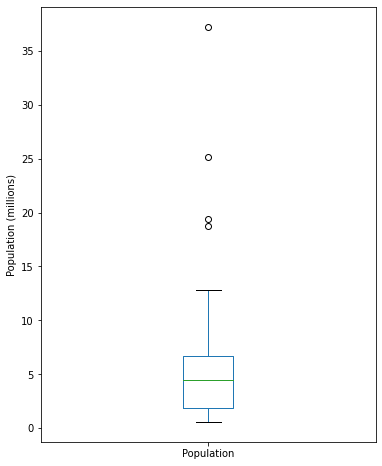

In [32]:
ax = (data['Population']/1000000).plot.box(figsize=(6,8))
ax.set_ylabel('Population (millions)')

From the boxplot, we can see that the median population is around 5 million. Half of the data falls between around 2 to 7 million and there are some high population outliers.The 25th and the 75th percentiles are the bottom and top part of the box respectively. The median is the horizontal line in the box. The lines that stem from the box, called *whiskers* represent the range of the bulk data. Any data outside the box and lines, denoted by circles in our plot, is considered an outlier.

Keep in mind that there are many different variations of the boxplot and not all functions implement it in the same way.

### Frequency tables and histograms

The frequency table for a variable divides the data into equidistant segments and tells us how many values are in each segment. Pandas has a method for this called `cut` and it maps the values into segments.

In [52]:
bin_population = pd.cut(data['Population'],10)
bin_population.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

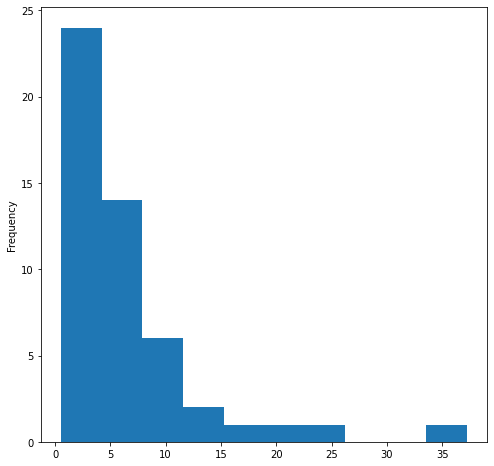

In [35]:
|(data['Population']/1000000).plot.hist(figsize=(8,8))

We can see that the most populous state has a population of 37253956 while the least populous state has 526935